# 0. Imports

In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from exchange.exchange_utils import get_exchange, fetch_data
from portfolio.mathematical import plot_equity, backtest
from strategy.mathematical import plot_signals_mca_strategy, apply_mca_strategy, apply_mca_guarded_strategy

# 2. Load Configs

In [2]:
def load_config(path="../config.yaml"):
    with open(path, "r") as f:
        return yaml.safe_load(f)

In [3]:
cfg = load_config()

# 3. Setup exchange

In [4]:
exchange =  get_exchange(config=cfg)

# 4. Fetch Data

In [5]:
df = fetch_data(config=cfg, exchange=exchange)

# 5. Apply Strategy

In [6]:
df_unguarded = apply_mca_strategy(df, config=cfg)

C:\Users\sharv\Documents\Sharvil\Projects\crypto-trader\strategy\mathematical.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][long_window:] = (df['SMA_SHORT'][long_window:] > df['SMA_LONG'][long_window:]).astype(int)
C:\Use

In [7]:
df_guarded = apply_mca_guarded_strategy(df, config=cfg)

C:\Users\sharv\Documents\Sharvil\Projects\crypto-trader\strategy\mathematical.py:73: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'].iloc[i] = df['Signal'].iloc[i]
C:\Users\sharv\Documents\Sharvil\Projects\crypto-trader\strategy

# 6. Backtest

In [8]:
equity_df_unguarded, final_value_unguarded, returns_unguarded = backtest(df_unguarded, config=cfg)

In [9]:
equity_df_guarded, final_value_guarded, returns_guarded = backtest(df_guarded, config=cfg)

In [10]:
print("GUARDED RETURNS")
print(f"Initial Balance: ${cfg['trading']['initial_balance']:.2f}")
print(f"Final Balance:   ${final_value_guarded:.2f}")
print(f"Total Return:    {returns_guarded:.2f}%")

GUARDED RETURNS
Initial Balance: $1000.00
Final Balance:   $1005.68
Total Return:    0.57%


In [11]:
print("UNGUARDED RETURNS")
print(f"Initial Balance: ${cfg['trading']['initial_balance']:.2f}")
print(f"Final Balance:   ${final_value_unguarded:.2f}")
print(f"Total Return:    {returns_unguarded:.2f}%")

UNGUARDED RETURNS
Initial Balance: $1000.00
Final Balance:   $2294.47
Total Return:    129.45%


# 7. Plot 

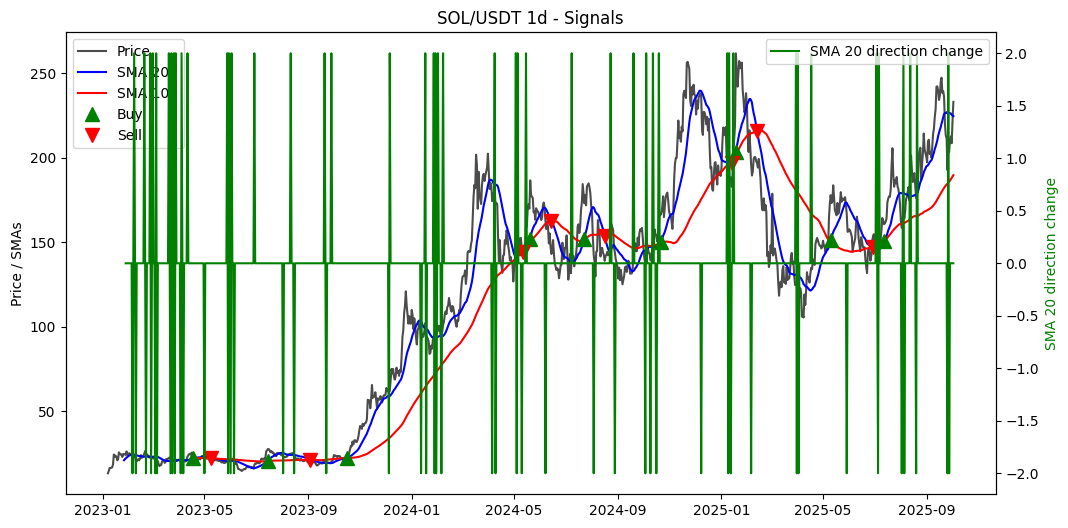

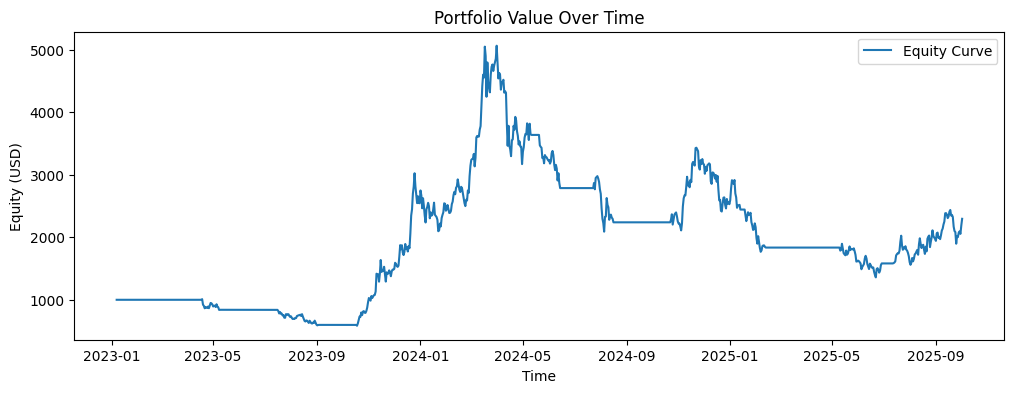

In [12]:
if cfg["plotting"]["plot_signals"]:
    plot_signals_mca_strategy(df_unguarded, config=cfg)
if cfg["plotting"]["plot_equity"]:
    plot_equity(equity_df_unguarded)

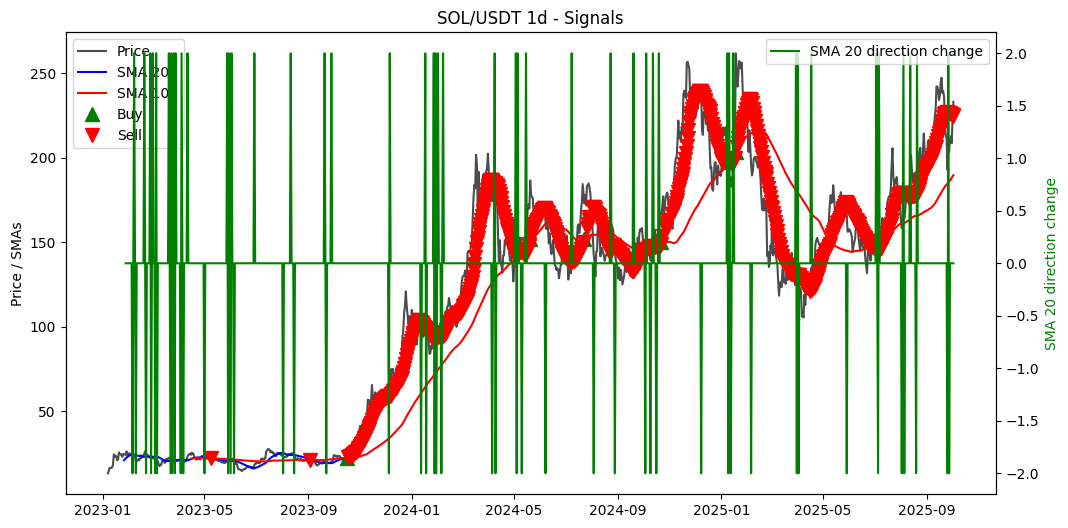

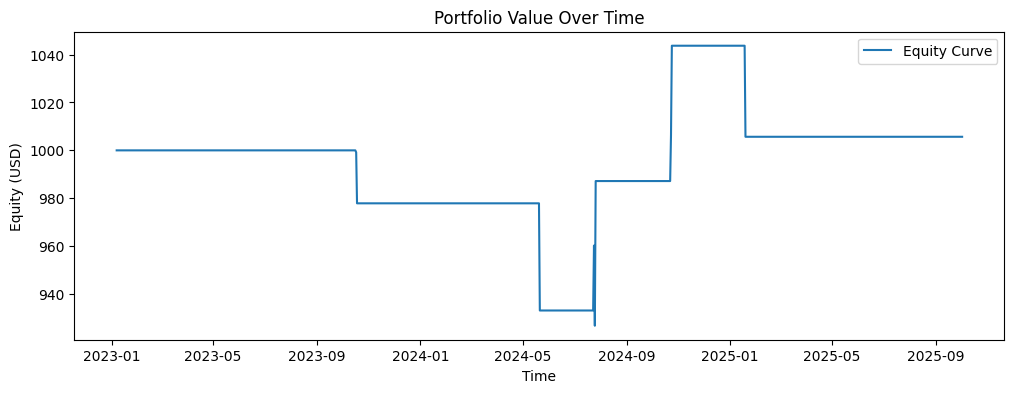

In [13]:
if cfg["plotting"]["plot_signals"]:
    plot_signals_mca_strategy(df_guarded, config=cfg)
if cfg["plotting"]["plot_equity"]:
    plot_equity(equity_df_guarded)